In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
csv1_path = "../results/empirical_results_pr_48_17_14_01_2025.csv"
csv2_path = "../results/empirical_results_grasp_39_17_14_01_2025.csv" 
csv3_path = "../results/empirical_results_tabu_19_19_14_01_2025.csv" 


df1 = pd.read_csv(csv1_path)
df2 = pd.read_csv(csv2_path)
df3 = pd.read_csv(csv3_path)

# Merge the two datasets on instance_name for comparison
comparison_df = pd.merge(df1, df2, on="instance_name", suffixes=("", "_grasp"))
comparison_df = pd.merge(comparison_df, df3, on="instance_name", suffixes=("_pr", "_tabu"))
comparison_df

,instance_name,objective_value_pr,runtime_pr,best_solution_pr,objective_value_grasp,runtime_grasp,best_solution_grasp,objective_value_tabu,runtime_tabu,best_solution_tabu
0,MDG-a_10_100_m10.txt,355.50,3.11,34 68 69 73 74 12 14 51 52 90,355.50,2.76,34 68 69 73 74 12 14 51 52 90,355.50,4.81,34 68 69 73 74 12 14 51 52 90
1,MDG-a_12_100_m10.txt,354.25,3.70,64 96 13 15 51 20 86 55 59 93,354.25,2.76,64 96 13 15 51 20 86 55 59 93,350.94,4.82,98 2 37 59 12 20 26 91 93 63
2,MDG-a_13_n500_m50.txt,7762.48,94.38,384 0 10 397 13 271 15 403 404 281 25 153 411 ...,7762.48,54.17,384 0 10 397 13 271 15 403 404 281 25 153 411 ...,7689.84,35.11,256 3 390 392 265 12 276 404 283 157 286 32 16...
3,MDG-a_14_100_m10.txt,356.06,2.27,65 67 72 51 53 22 30 25 94 95,356.06,2.42,65 67 72 51 53 22 30 25 94 95,354.71,4.69,65 99 67 72 51 53 22 25 94 95
4,MDG-a_16_n500_m50.txt,7776.17,93.23,0 3 264 136 10 138 21 280 158 159 33 161 294 2...,7768.84,55.93,0 3 264 10 136 21 280 158 159 33 161 294 295 4...,7680.64,34.35,257 3 264 136 10 139 398 21 278 277 280 279 28...
5,MDG-a_17_n500_m50.txt,7785.98,89.02,131 140 141 10 16 402 273 148 150 280 25 284 4...,7785.98,54.69,131 140 141 10 16 402 273 148 150 280 25 284 4...,7672.15,33.63,132 388 4 389 267 13 271 402 404 280 408 27 28...
6,MDG-a_19_n500_m50.txt,7726.83,90.83,385 131 133 390 137 395 271 15 404 277 406 280...,7712.06,55.82,385 131 5 390 137 395 404 277 280 154 155 412 ...,7649.00,35.42,257 5 390 134 8 133 138 269 406 280 154 34 420...
7,MDG-a_1_100_m10.txt,360.15,2.06,1 26 37 74 43 13 80 31 86 57,360.15,2.22,1 26 37 74 43 13 80 31 86 57,359.81,4.65,65 36 40 80 16 22 86 26 92 31
8,MDG-a_20_100_m10.txt,349.31,2.62,67 40 77 82 52 53 85 25 92 93,349.31,2.23,67 40 77 82 52 85 53 25 92 93,343.39,4.69,72 16 82 20 21 85 52 25 92 30
9,MDG-a_20_n500_m50.txt,7716.85,96.25,130 393 394 395 269 402 21 151 410 27 284 156 ...,7703.75,52.63,257 130 388 392 394 395 272 17 20 408 153 410 ...,7627.84,34.12,128 132 13 21 277 279 417 421 423 429 430 431 ...


In [ ]:
# Add a column to differentiate instances by size (500 or 100)
comparison_df["instance_size"] = comparison_df["instance_name"].apply(
    lambda x: "500" if "n500" in x else "100"
)

# Calculate differences
comparison_df["objective_diff"] = comparison_df["objective_value_pr"] - comparison_df["objective_value_grasp"]
comparison_df["runtime_diff"] = comparison_df["runtime_pr"] - comparison_df["runtime_grasp"]

comparison_df


,instance_name,objective_value_pr,runtime_pr,best_solution_pr,best_solution_grasp,objective_value_grasp,runtime_grasp,instance_size,objective_diff,runtime_diff
0,MDG-a_10_100_m10.txt,355.50,2.23,34 68 69 73 74 12 14 51 52 90,68 34 69 73 12 14 51 52 90 93,354.96,0.39,100,0.54,1.84
1,MDG-a_12_100_m10.txt,354.25,2.11,64 13 15 20 86 93 96 51 55 59,64 13 15 20 86 93 96 51 55 59,354.25,0.41,100,0.00,1.70
2,MDG-a_13_n500_m50.txt,7734.81,47.13,256 0 386 3 384 261 9 10 394 273 402 277 153 1...,256 384 386 3 0 261 9 10 394 273 402 277 154 4...,7722.99,7.76,500,11.82,39.37
3,MDG-a_14_100_m10.txt,356.06,1.71,65 67 72 22 25 94 95 30 51 53,65 67 72 22 25 94 95 30 51 53,356.06,0.39,100,0.00,1.32
4,MDG-a_16_n500_m50.txt,7713.81,46.91,3 389 392 263 10 9 278 279 280 150 283 415 33 ...,3 389 392 263 10 9 278 279 280 150 283 415 33 ...,7713.81,6.14,500,0.00,40.77
5,MDG-a_17_n500_m50.txt,7743.88,47.03,0 257 384 387 133 134 261 392 10 267 140 394 1...,0 257 2 387 384 133 134 261 392 10 267 140 269...,7743.14,6.19,500,0.74,40.84
6,MDG-a_19_n500_m50.txt,7697.00,46.11,0 131 132 390 134 137 10 265 395 404 148 151 2...,0 385 131 132 134 390 137 10 265 395 404 148 2...,7690.87,6.16,500,6.13,39.95
7,MDG-a_1_100_m10.txt,360.15,1.61,1 37 74 43 13 80 86 57 26 31,1 37 74 43 13 80 86 57 26 31,360.15,0.27,100,0.00,1.34
8,MDG-a_20_100_m10.txt,349.31,1.73,67 40 77 82 52 85 53 25 92 93,72 16 82 52 85 21 20 53 25 92,348.68,0.27,100,0.63,1.46
9,MDG-a_20_n500_m50.txt,7700.53,45.91,256 386 261 134 10 11 401 147 23 408 24 282 28...,256 386 261 134 10 11 401 147 23 408 24 282 28...,7700.53,5.81,500,0.00,40.10


In [5]:
# Calculate differences
comparison_df["objective_diff"] = comparison_df["objective_value_pr"] - comparison_df["objective_value_grasp"]
comparison_df["runtime_diff"] = comparison_df["runtime_pr"] - comparison_df["runtime_grasp"]

# Summary statistics
print("Summary Statistics:")
print(comparison_df[["objective_diff", "runtime_diff"]].describe())

Summary Statistics:
       objective_diff  runtime_diff
count       15.000000     15.000000
mean         2.013333     24.195333
std          3.434673     19.213050
min          0.000000      1.280000
25%          0.000000      1.580000
50%          0.540000     37.550000
75%          2.155000     39.660000
max         11.820000     40.840000


In [6]:
# Split the data into 500-element and 100-element instances
df_500 = comparison_df[comparison_df["instance_size"] == "500"]
df_100 = comparison_df[comparison_df["instance_size"] == "100"]

print("Summary Statistics:")
print(df_100[["objective_diff", "runtime_diff"]].describe())

print("Summary Statistics:")
print(df_500[["objective_diff", "runtime_diff"]].describe())

Summary Statistics:
       objective_diff  runtime_diff
count         6.00000      6.000000
mean          0.19500      1.490000
std           0.30343      0.229347
min           0.00000      1.280000
25%           0.00000      1.325000
50%           0.00000      1.400000
75%           0.40500      1.640000
max           0.63000      1.840000
Summary Statistics:
       objective_diff  runtime_diff
count        9.000000      9.000000
mean         3.225556     39.332222
std          4.056384      1.244656
min          0.000000     37.430000
25%          0.000000     38.830000
50%          1.210000     39.370000
75%          6.030000     40.100000
max         11.820000     40.840000


In [12]:
df_500.select_dtypes(include='number').aggregate('mean'), df_100.select_dtypes(include='number').aggregate('mean')

(objective_value_pr       7710.087778
 runtime_pr                 45.591111
 objective_value_grasp    7706.862222
 runtime_grasp               6.258889
 objective_diff              3.225556
 runtime_diff               39.332222
 dtype: float64,
 objective_value_pr       355.165
 runtime_pr                 1.825
 objective_value_grasp    354.970
 runtime_grasp              0.335
 objective_diff             0.195
 runtime_diff               1.490
 dtype: float64)

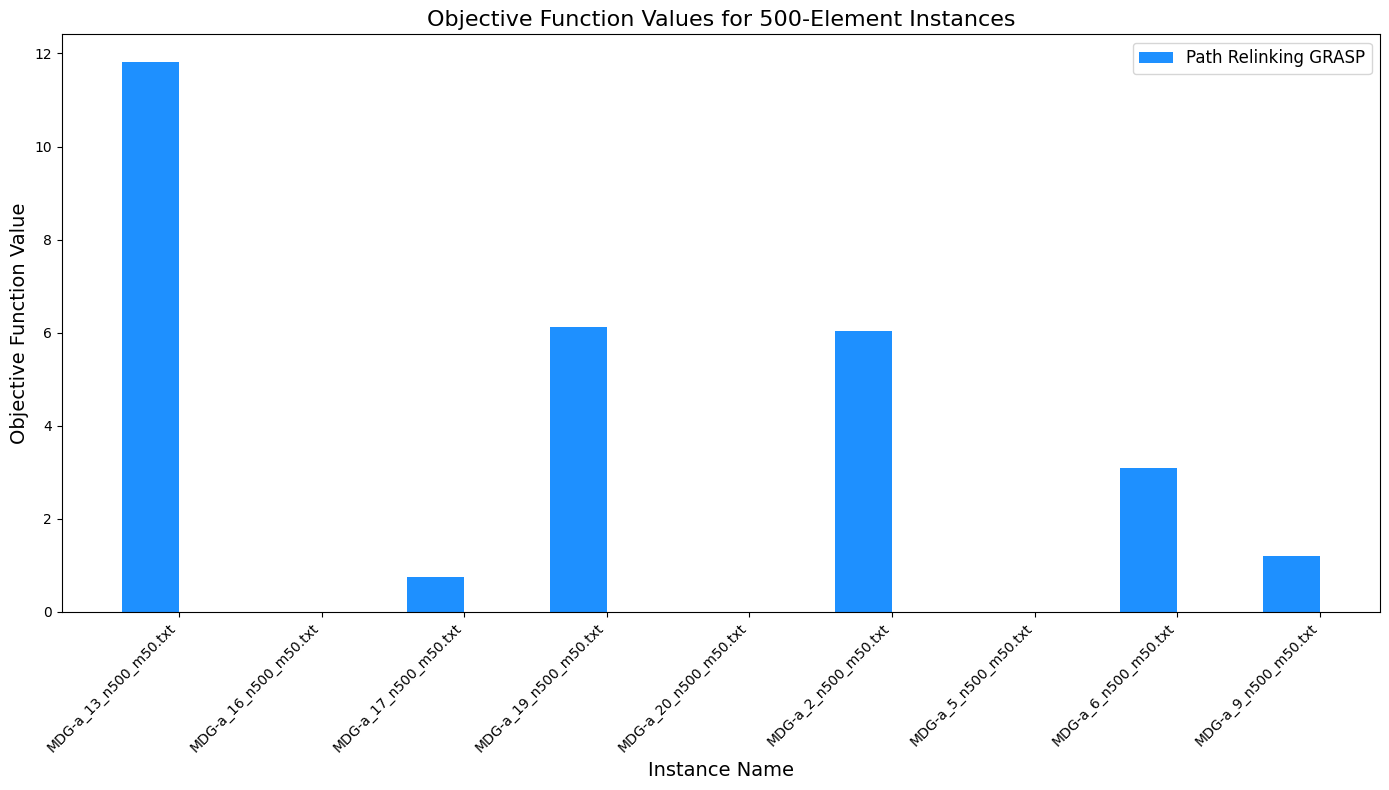

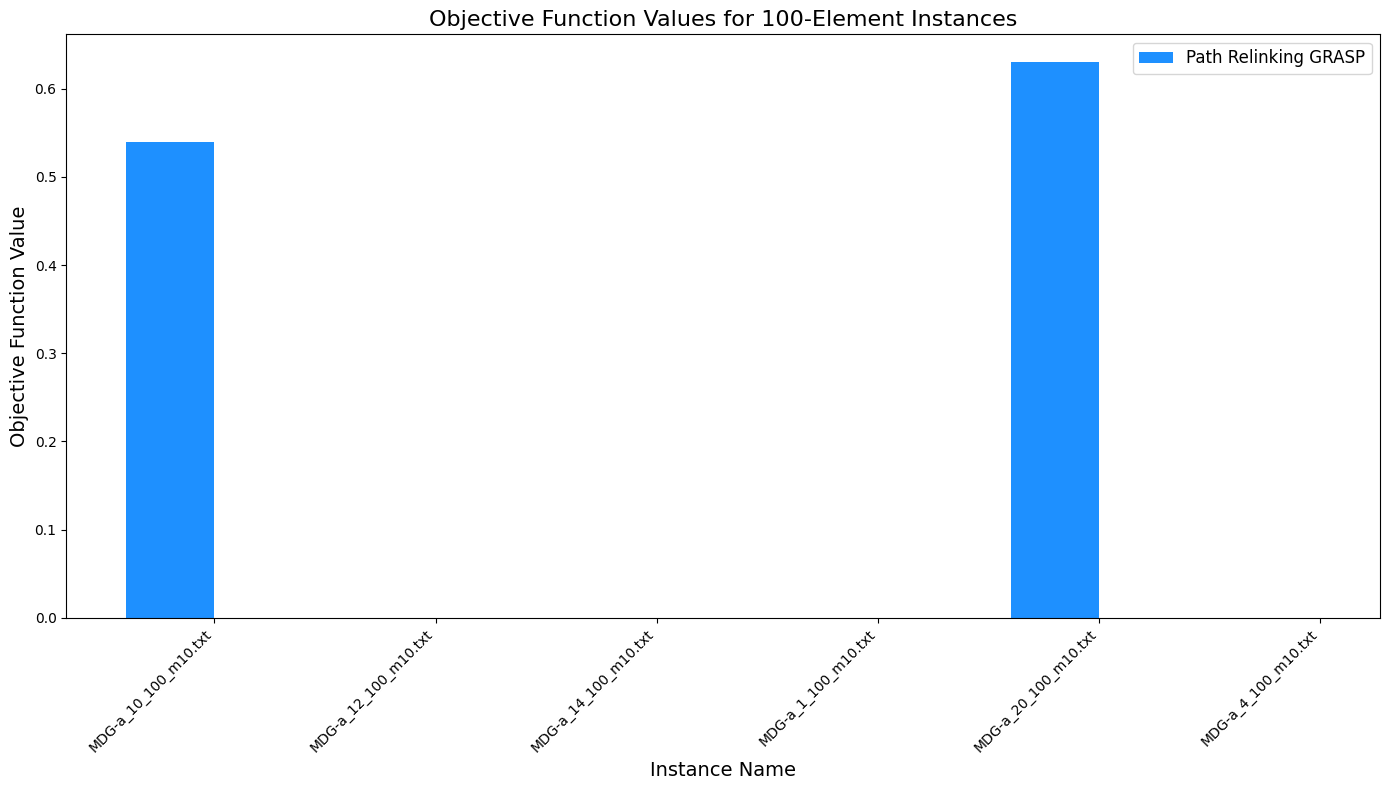

In [7]:
# Add a column to differentiate instances by size (500 or 100)
comparison_df["instance_size"] = comparison_df["instance_name"].apply(
    lambda x: "500" if "n500" in x else "100"
)

# Split the data into 500-element and 100-element instances
df_500 = comparison_df[comparison_df["instance_size"] == "500"]
df_100 = comparison_df[comparison_df["instance_size"] == "100"]

# Plot Objective Function (OF) values for 500-element instances
plt.figure(figsize=(14, 8))
df_500 = df_500.sort_values("instance_name")
bar_width = 0.4
x = range(len(df_500))
x_pr = [i - bar_width / 2 for i in x]
x_grasp = [i + bar_width / 2 for i in x]

plt.bar(x_pr, df_500["objective_diff"], width=bar_width, label="Path Relinking GRASP", color="dodgerblue")
# plt.bar(x_grasp, df_500["objective_value_grasp"], width=bar_width, label="GRASP", color="orange")

plt.title("Objective Function Values for 500-Element Instances", fontsize=16)
plt.xlabel("Instance Name", fontsize=14)
plt.ylabel("Objective Function Value", fontsize=14)
plt.xticks(ticks=x, labels=df_500["instance_name"], rotation=45, ha="right", fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot Objective Function (OF) values for 100-element instances
plt.figure(figsize=(14, 8))
df_100 = df_100.sort_values("instance_name")
x = range(len(df_100))
x_pr = [i - bar_width / 2 for i in x]
x_grasp = [i + bar_width / 2 for i in x]

plt.bar(x_pr, df_100["objective_diff"], width=bar_width, label="Path Relinking GRASP", color="dodgerblue")
# plt.bar(x_grasp, df_100["objective_value_grasp"], width=bar_width, label="GRASP", color="orange")

plt.title("Objective Function Values for 100-Element Instances", fontsize=16)
plt.xlabel("Instance Name", fontsize=14)
plt.ylabel("Objective Function Value", fontsize=14)
plt.xticks(ticks=x, labels=df_100["instance_name"], rotation=45, ha="right", fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()